## Cameron Roehlk
## ABE 516X

This notebook can be found on GitHub under isu-abe/516x/croehlk named Roehlk-Naive_Bayes_Classification_Task.ipynb

## Task:  classify origin of wine based on physio-chemical analysis data. 

You are provided data that are the results of a chemical analysis of wines grown in the same region in Italy but derived from three different cultivars. The analysis determined the quantities of 13 constituents found in each of the three types of wines.

Details can be [**found here**](http://archive.ics.uci.edu/ml/datasets/Wine).

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## Read in the data 

#### Read in the data set

In [2]:
df = pd.read_csv('../Data/wine.data.csv', header=None)
df.columns = ['Class', 'Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash', 'Magnesium', 'Total phenols', 'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins', 'Color intensity', 'Hue', 'OD280/OD315 of diluted wines', 'Proline']
df.head(10)


,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
5,1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450
6,1,14.39,1.87,2.45,14.6,96,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290
7,1,14.06,2.15,2.61,17.6,121,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295
8,1,14.83,1.64,2.17,14.0,97,2.80,2.98,0.29,1.98,5.20,1.08,2.85,1045
9,1,13.86,1.35,2.27,16.0,98,2.98,3.15,0.22,1.85,7.22,1.01,3.55,1045


#### Describe the basic statistics of the features

In [3]:
df.describe()

,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


#### Make boxplots by output labels/classes - do any features classify the wine based on these figures?

If so (and hint, they do!), make a scatter plot showing the correlation of two features showing the correlation of two features and class separation by these features

In [4]:
#Make a list of all the columns
list(df.columns)

['Class',
 'Alcohol',
 'Malic acid',
 'Ash',
 'Alcalinity of ash',
 'Magnesium',
 'Total phenols',
 'Flavanoids',
 'Nonflavanoid phenols',
 'Proanthocyanins',
 'Color intensity',
 'Hue',
 'OD280/OD315 of diluted wines',
 'Proline']

Create a boxplot for each column to give a visual representation of each index compared to each class.

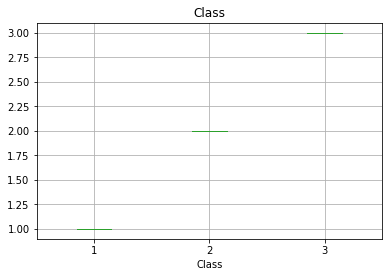

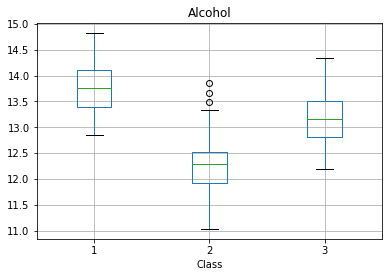

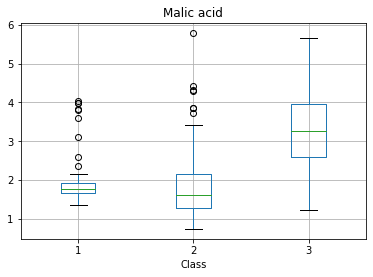

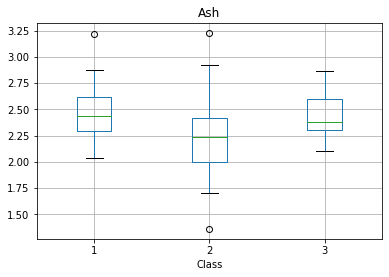

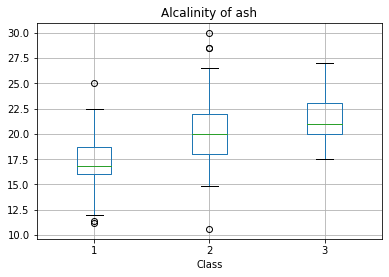

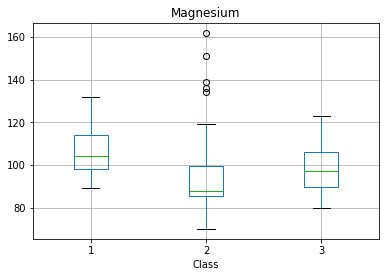

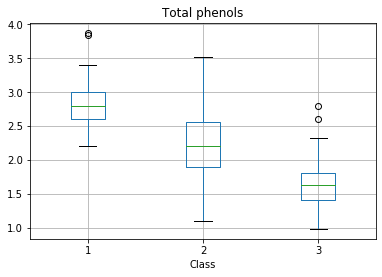

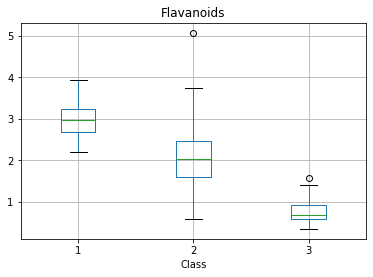

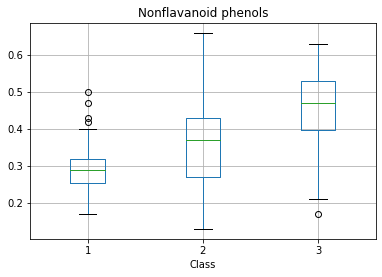

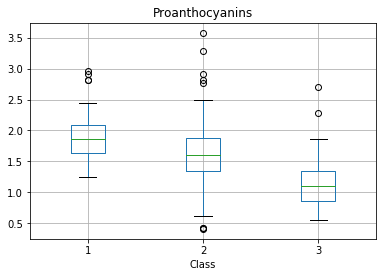

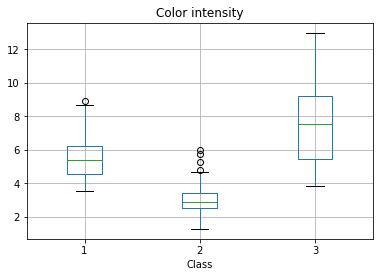

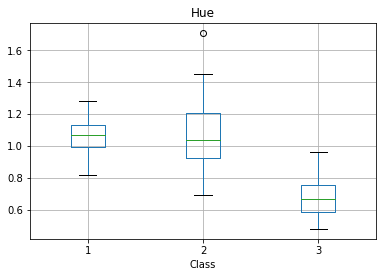

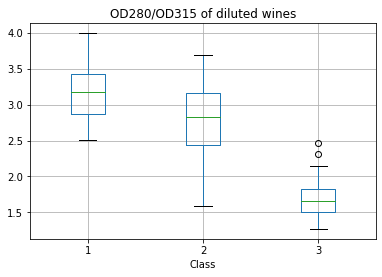

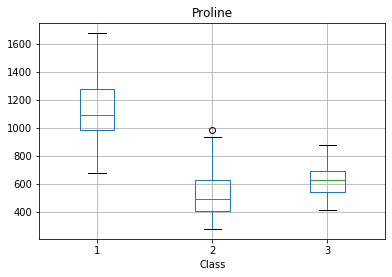

In [5]:
for x in df.columns:
    boxplot = df.boxplot(x, by = 'Class')   
    plt.suptitle('')

Next step is to look at the columns that have distintly seperate means. If the features have different means for each class, they can be used to help predict different classes. I took those features that look to have different means for each class and added those to my pairplot where I can analyse them visually again.

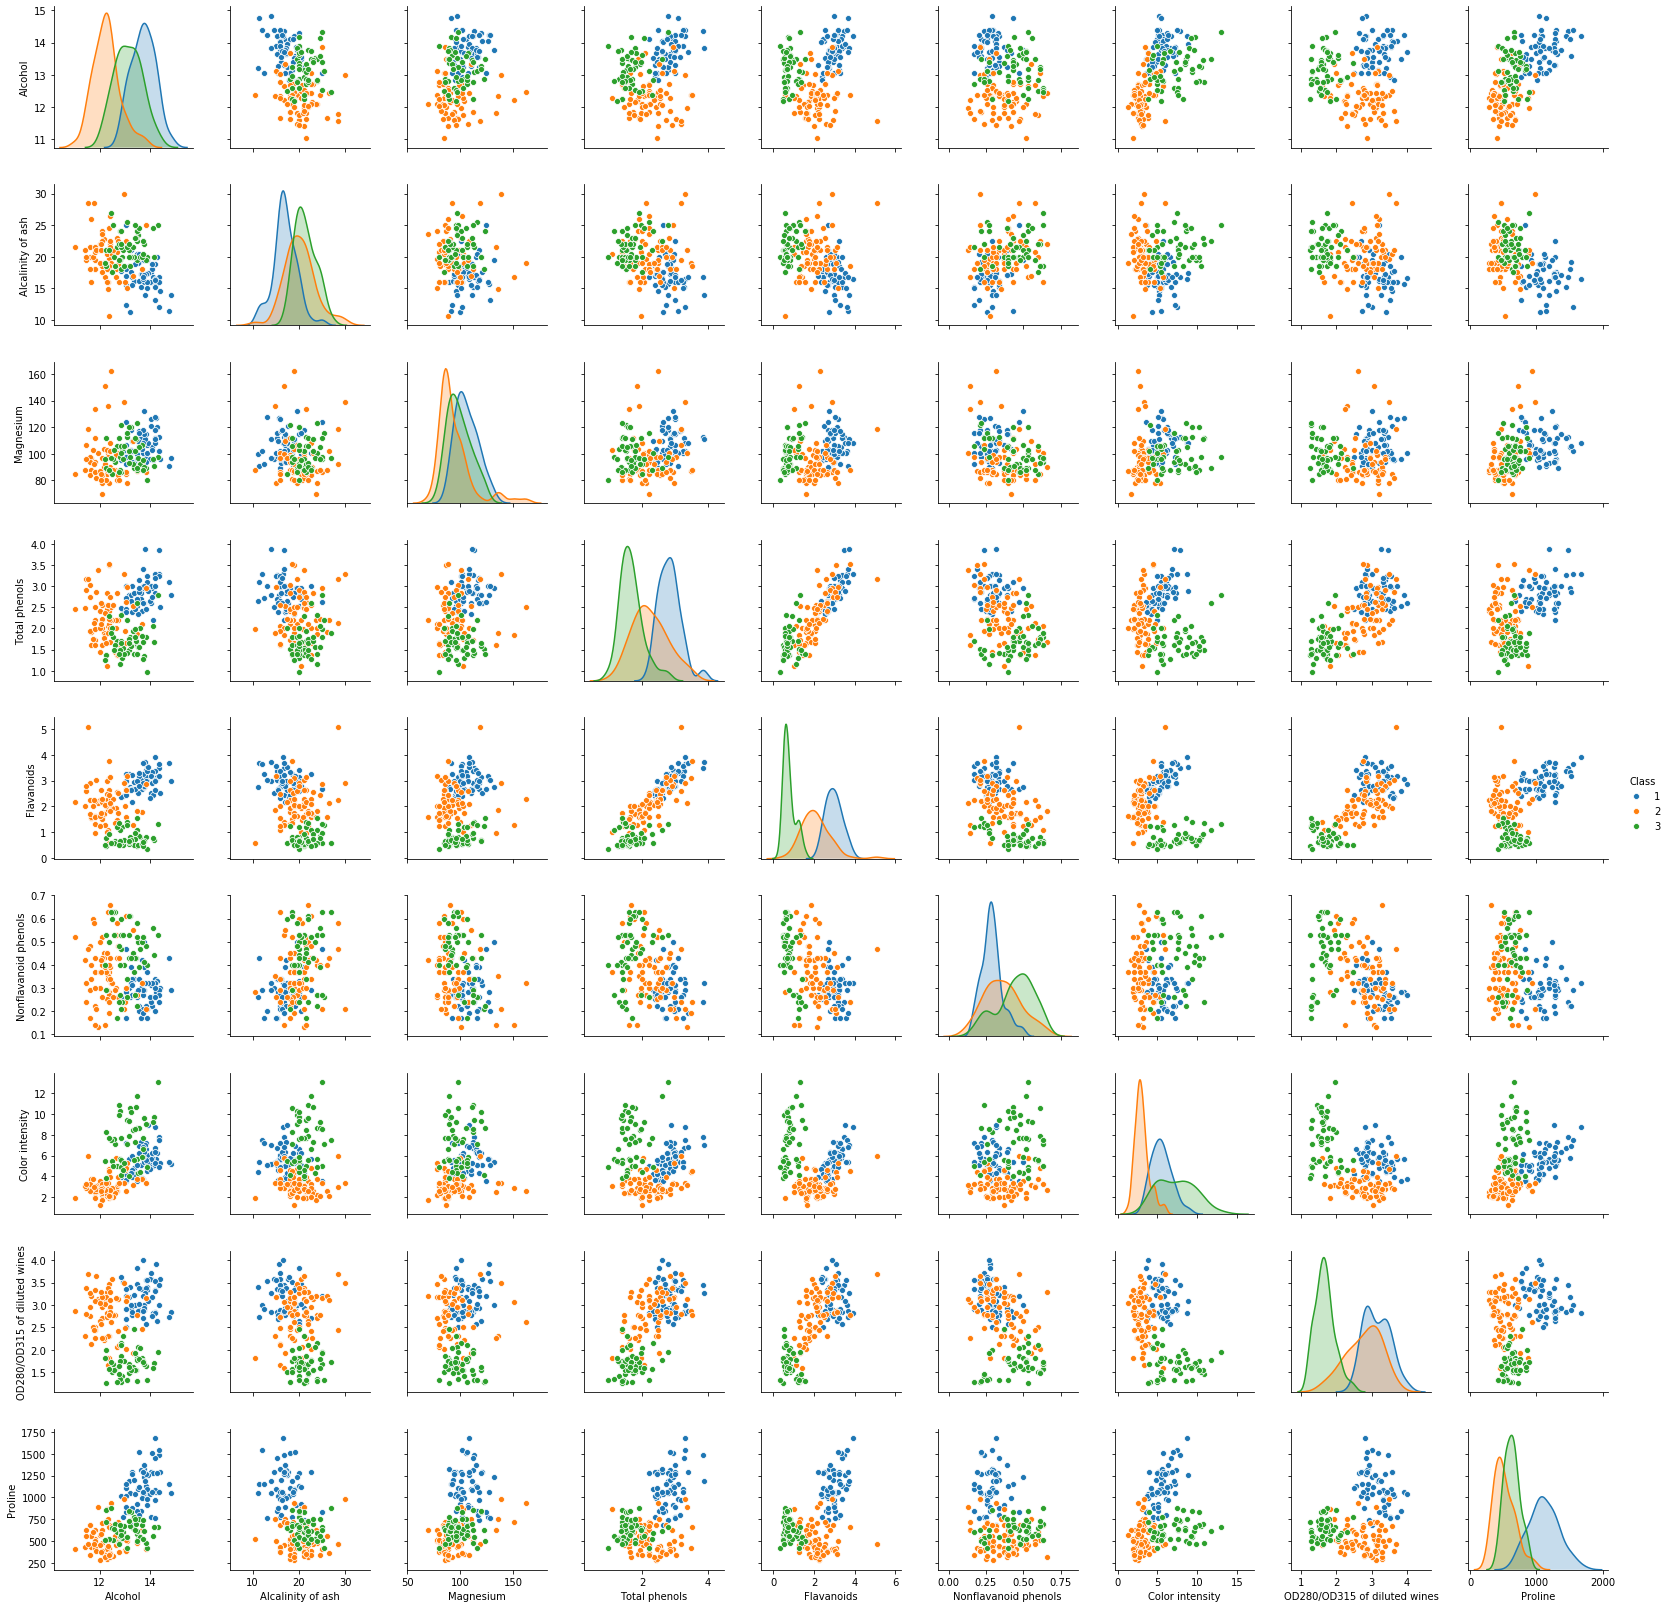

In [6]:
import seaborn as sns
sns.pairplot(df, hue ='Class', vars= ['Alcohol' ,'Alcalinity of ash', 'Magnesium', 'Total phenols', 'Flavanoids', 'Nonflavanoid phenols', 'Color intensity', 'OD280/OD315 of diluted wines', 'Proline' ])

Looking at the pairplot, the features that are distinctively sepreate by class across other features is Alcohol, Flavanoids, Color Intensity, OD280/OD315 of diluted wines.

####  Naive Bayes Classification

Use [Naive Bayes Classification](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html) to create a model to classify wine base on attributes.  Justify how good the model is for the wine classification.  Note that some of the metrics we've used in class are only for *binary* classifications, so may not eb applicable here.


In [73]:
%matplotlib inline
import matplotlib.pyplot as plt
import csv
import pandas
import sklearn
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.svm import SVC, LinearSVC
from sklearn.metrics import classification_report, f1_score, accuracy_score, confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold, cross_val_score, train_test_split 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import learning_curve

Create a new data from of desired features of Alcohol, Flavanoids, Color Intensity, OD280/OD315 of diluted wines.

In [75]:
selected_data = {'Class':df['Class'], 'Alcohol':df['Alcohol'],'Flavanoids':df['Flavanoids'],'Color intensity':df['Color intensity'], 'OD280/OD315 of diluted wines':df['OD280/OD315 of diluted wines']}
selected_df = pd.DataFrame(selected_data, columns = ['Class','Alcohol','Flavanoids','Color intensity','OD280/OD315 of diluted wines'])
selected_df.head()

,Class,Alcohol,Flavanoids,Color intensity,OD280/OD315 of diluted wines
0,1,14.23,3.06,5.64,3.92
1,1,13.20,2.76,4.38,3.40
2,1,13.16,3.24,5.68,3.17
3,1,14.37,3.49,7.80,3.45
4,1,13.24,2.69,4.32,2.93


Now I need to seperate my data into two different data sets

In [76]:
feature_data = selected_df[selected_df.columns[1:]]
class_data = selected_df['Class']
print(feature_data.shape)
print(class_data.shape)

(178, 4)
(178,)


Then split those two data sets into a training set and a test set

In [77]:
feature_data_train, feature_data_test, class_data_train, class_data_test = train_test_split(feature_data, class_data, test_size=0.25, random_state=1)
print(feature_data_train.shape)
print(class_data_train.shape)

(133, 4)
(133,)


Because I have a continuous data set and a normal distribution, a Gaussian is the Naive Bayes algorithm that I want to use

In [85]:
nb = GaussianNB()
nb.fit(feature_data_train, class_data_train)

GaussianNB(priors=None, var_smoothing=1e-09)

Now I want to be able to predict the class of wine based off of the feature data

In [80]:
predict_class = nb.predict(feature_data_test)

Using the features of Alcohol, Flavanoids, Color Intensity, and OD280/OD315 of diluted wines, I can accuarately predict the wine class 95.6% of the time.

In [81]:
metrics.accuracy_score(class_data_test, predict_class)

0.9555555555555556

Using a Confusion Matrix, I can see which classes were predicted correctly or incorrect. Looking at my confusion matrix, Class 1 was accurately predicted 18 times and Class 3 was accurately predicted 10 times. Class 2 was predicted correctly 15 times and incorrectly twice. One time it was predicted Class 1, and the other Class 3.

In [82]:
cm = metrics.confusion_matrix(class_data_test, predict_class)
cmdf = pd.DataFrame(cm, index = ['Class 1','Class 2','Class 3'], columns = ['Class 1','Class 2', 'Class 3'])
print(cmdf)

         Class 1  Class 2  Class 3
Class 1       18        0        0
Class 2        1       15        1
Class 3        0        0       10


I can check the accuracy of my confusion matrix and see it is the same as my predicted accuracy.

In [86]:
(18+15+10) / (18+1+15+1+10)

0.9555555555555556

Using the function classification report, I can look at other performance meaasurements.

In [87]:
print(classification_report(predict_class, class_data_test))

              precision    recall  f1-score   support

           1       1.00      0.95      0.97        19
           2       0.88      1.00      0.94        15
           3       1.00      0.91      0.95        11

    accuracy                           0.96        45
   macro avg       0.96      0.95      0.95        45
weighted avg       0.96      0.96      0.96        45

